Title: PubMedImporter

Author: Rafael Avlarado

Date: April 2022

Availability: http://localhost:8888/notebooks/Documents/Research/PubMedImporter.ipynb

# PubMed Importer

In [1]:
import pandas as pd
from glob import glob
import re

In [3]:
abstracts_files_mask = 'PubMed/Abstracts/*.txt'

In [4]:
doc_id = None
key = None
val = None
data = {}
for file in sorted(glob(abstracts_files_mask)):
    print(file)
    for line in open(file, encoding="utf8").readlines():
        line = line.rstrip()
        if re.match(r"^\w", line): 
            r = line.split('-')
            key = r[0].strip()
            val = '-'.join(r[1:])
            if key == 'PMID':
                doc_id = val
                data[doc_id] = {}
            else:
                data[doc_id][key] = val
        else:
            data[doc_id][key] += line.strip() + " "            

PubMed/Abstracts/pubmed-physicalfi-set (1).txt
PubMed/Abstracts/pubmed-physicalfi-set (2).txt
PubMed/Abstracts/pubmed-physicalfi-set (3).txt
PubMed/Abstracts/pubmed-physicalfi-set (4).txt
PubMed/Abstracts/pubmed-physicalfi-set (5).txt
PubMed/Abstracts/pubmed-physicalfi-set (6).txt
PubMed/Abstracts/pubmed-physicalfi-set (7).txt
PubMed/Abstracts/pubmed-physicalfi-set (8).txt
PubMed/Abstracts/pubmed-physicalfi-set (9).txt


In [5]:
DF = pd.DataFrame(data).T.sort_index()

In [6]:
DF.shape

(59280, 79)

In [7]:
DF.AB

 16386740     BACKGROUND: Although many pregnant women expe...
 16387814     Non-invasive methods for detection of coronar...
 16396980     OBJECTIVE: To formulate EULAR recommendations...
 16406152     Recent research in rodents suggests that exte...
 16463043     The metabolic cost of walking (C(W)) is incre...
                                   ...                        
 33308820     BACKGROUND: The few previous studies that foc...
 33308821     PURPOSE: The purpose of this study was to exa...
 33442078     The Asia-Pacific region carries a high diseas...
 34430662     Background: Pulmonary arterial hypertension (...
 35187250     The Eastern Pennsylvania Delaware Geriatric E...
Name: AB, Length: 59280, dtype: object

# Data Dictionary

* https://www.nlm.nih.gov/bsd/mms/medlineelements.html

In [8]:
DICT =  pd.read_csv("PubMed/datadict.txt", sep='\t').set_index('key')

# Select Columns to Keep

Keep columns that have value counts above a threshhold.

In [9]:
DICT['n'] = DICT.join(DF.T, how='right').count(1)

In [10]:
DICT.n = DICT.n.fillna(0).astype('int')

In [11]:
DICT.sort_values('n', ascending=False)

,value,n
key,,
PT,Publication Type,59281
EDAT,Entrez Date,59281
DP,Date of Publication,59281
LA,Language,59281
STAT,Status,59281
...,...,...
DA,Date Created,0
VTI,Volume Title,0
PUBM,Publishing Model,0


In [12]:
DICT.n.describe()

count       85.000000
mean     22361.035294
std      27002.007984
min          0.000000
25%          8.000000
50%       1671.000000
75%      58550.000000
max      59281.000000
Name: n, dtype: float64

<AxesSubplot:>

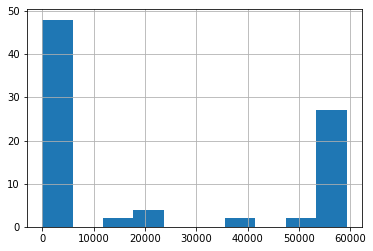

In [13]:
DICT.n.hist()

In [14]:
DICT.loc['AB']

value    Abstract
n           57902
Name: AB, dtype: object

In [15]:
n_thresh = 15

In [16]:
DICT['keep'] = DICT.n >= n_thresh

In [17]:
COLS = DICT[DICT.keep == True].index

# Select Rows to Keep

Keep rows with abstract lengths above a certain threshhold.

In [18]:
DF2 = DF[COLS].copy()

In [19]:
DF2.shape

(59280, 61)

In [20]:
DF2.AB

 16386740     BACKGROUND: Although many pregnant women expe...
 16387814     Non-invasive methods for detection of coronar...
 16396980     OBJECTIVE: To formulate EULAR recommendations...
 16406152     Recent research in rodents suggests that exte...
 16463043     The metabolic cost of walking (C(W)) is incre...
                                   ...                        
 33308820     BACKGROUND: The few previous studies that foc...
 33308821     PURPOSE: The purpose of this study was to exa...
 33442078     The Asia-Pacific region carries a high diseas...
 34430662     Background: Pulmonary arterial hypertension (...
 35187250     The Eastern Pennsylvania Delaware Geriatric E...
Name: AB, Length: 59280, dtype: object

In [21]:
DF2['AB_len'] = DF2.AB.str.len()

In [22]:
DF2

,AB,CI,AD,AID,AU,AUID,FAU,BTI,CTI,COIS,...,TT,VI,CIN,CON,EIN,RPI,UIN,UOF,SPIN,AB_len
16386740,BACKGROUND: Although many pregnant women expe...,NaN,"Gwangju Health College, South Korea.",10.1016/j.ijnurstu.2005.11.016 [doi],Kim JS,NaN,"Kim, Jin-Sun",NaN,NaN,NaN,...,NaN,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.0
16387814,Non-invasive methods for detection of coronar...,NaN,"Department of Internal Medicine, Division of ...",10.1136/hrt.2005.069195 [doi],Grayburn PA,NaN,"Grayburn, Paul A",NaN,NaN,Competing interests: PAG receives grant suppo...,...,NaN,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,974.0
16396980,OBJECTIVE: To formulate EULAR recommendations...,NaN,"Immuno-Rhumatologie, Lapeyronie Hosp, Montpel...",10.1136/ard.2005.044354 [doi],Yazici H,NaN,"Yazici, H",NaN,NaN,NaN,...,NaN,66,Nat Clin Pract Rheumatol. 2007 Jul;3(7):374-5...,NaN,NaN,NaN,NaN,NaN,NaN,1842.0
16406152,Recent research in rodents suggests that exte...,NaN,Beckman Institute for Advanced Science and Te...,10.1016/j.neurobiolaging.2005.11.016 [doi],Kramer AF,NaN,"Kramer, Arthur F",NaN,NaN,NaN,...,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1013.0
16463043,The metabolic cost of walking (C(W)) is incre...,NaN,Institute for Biophysical and Clinical Resear...,10.1007/s00421-006-0141-9 [doi],Minetti AE,NaN,"Minetti, Alberto E",NaN,NaN,NaN,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1509.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33308820,BACKGROUND: The few previous studies that foc...,Copyright © 2019. Production and hosting by E...,Graduate Institute of Sports Equipment Techno...,10.1016/j.jshs.2017.01.001 [doi],Liu C,NaN,"Liu, Chiang",NaN,NaN,NaN,...,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1634.0
33308821,PURPOSE: The purpose of this study was to exa...,Copyright © 2019. Production and hosting by E...,"Sports Research Centre, Miguel Hernandez Univ...",10.1016/j.jshs.2016.08.011 [doi],Vera-Garcia FJ,NaN,"Vera-Garcia, Francisco J",NaN,NaN,NaN,...,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2123.0
33442078,The Asia-Pacific region carries a high diseas...,© 2017 Journal of the ASEAN Federation of End...,National Institute of Diabetes and Endocrinol...,10.15605/jafes.032.01.02 [doi],Uddin F,NaN,"Uddin, Farid",NaN,NaN,The authors have received honoraria for their...,...,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1488.0
34430662,Background: Pulmonary arterial hypertension (...,NaN,"Policy Analysis Inc. (PAI), Brookline, MA, USA.",9871 [pii],Oster G,NaN,"Oster, Gerry",NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1974.0


In [23]:
DF2.AB_len.describe()

count    57901.000000
mean      1660.933611
std        604.252561
min         98.000000
25%       1385.000000
50%       1651.000000
75%       1860.000000
max      62920.000000
Name: AB_len, dtype: float64

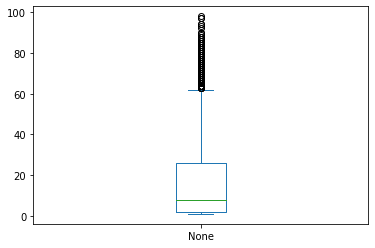

In [24]:
DF2.value_counts('AB_len').plot.box();

In [25]:
len_thresh = 25

In [26]:
DF3 = DF2[DF2.AB_len > len_thresh]

In [27]:
DF3.shape

(57901, 62)

In [28]:
DF3.count().sort_values()

ISBN         14
FED          20
ED           20
RPI          29
CTI          38
          ...  
EDAT      57901
DP        57901
CRDT      57901
STAT      57901
AB_len    57901
Length: 62, dtype: int64

# Note

You may want to keep only ~rows~ cols that have a value of 57901, unless you want to impute values in the other columns.

In [29]:
# col_thresh = 106990
# result = DF3.count()
# result
# DF4 = DF3[:, result > col_thresh]

In [30]:
DICT.n.describe()

count       85.000000
mean     22361.035294
std      27002.007984
min          0.000000
25%          8.000000
50%       1671.000000
75%      58550.000000
max      59281.000000
Name: n, dtype: float64

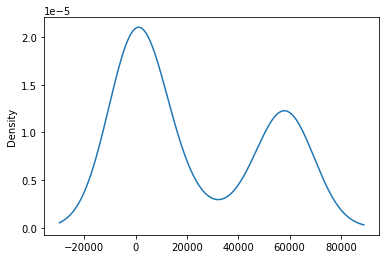

In [31]:
DICT.n.plot.kde();

In [32]:
col_thresh = DICT.n.quantile(.7)
# col_thresh = 3000 # <-- If you want to keep more

In [33]:
col_thresh

56797.4

In [34]:
KEEP_COLS = DICT[DICT.n >= col_thresh].index

In [35]:
DF4 = DF3[KEEP_COLS]

In [36]:
DF4

,AB,AD,AID,AU,FAU,CRDT,DCOM,LR,DP,EDAT,...,JID,OWN,PG,PHST,PST,PT,SO,STAT,TI,VI
16386740,BACKGROUND: Although many pregnant women expe...,"Gwangju Health College, South Korea.",10.1016/j.ijnurstu.2005.11.016 [doi],Kim JS,"Kim, Jin-Sun",2006/01/03 09:00,20070302,20220311,2007 Jan,2006/01/03 09:00,...,0400675,NLM,19-28,2006/01/03 09:00 [entrez],ppublish,Multicenter Study,Int J Nurs Stud. 2007 Jan;44(1):19-28. doi: 1...,MEDLINE,Effects of a back-pain-reducing program durin...,44
16387814,Non-invasive methods for detection of coronar...,"Department of Internal Medicine, Division of ...",10.1136/hrt.2005.069195 [doi],Grayburn PA,"Grayburn, Paul A",2006/01/03 09:00,20070417,20181113,2007 Mar,2006/01/03 09:00,...,9602087,NLM,290-7,2006/01/03 09:00 [entrez],ppublish,Journal Article,Heart. 2007 Mar;93(3):290-7. doi: 10.1136/hrt...,MEDLINE,Non-invasive coronary angiography using multi...,93
16396980,OBJECTIVE: To formulate EULAR recommendations...,"Immuno-Rhumatologie, Lapeyronie Hosp, Montpel...",10.1136/ard.2005.044354 [doi],Yazici H,"Yazici, H",2006/01/07 09:00,20070130,20220330,2007 Jan,2006/01/07 09:00,...,0372355,NLM,34-45,2006/01/07 09:00 [entrez],ppublish,Practice Guideline,Ann Rheum Dis. 2007 Jan;66(1):34-45. doi: 10....,MEDLINE,EULAR recommendations for the management of e...,66
16406152,Recent research in rodents suggests that exte...,Beckman Institute for Advanced Science and Te...,10.1016/j.neurobiolaging.2005.11.016 [doi],Kramer AF,"Kramer, Arthur F",2006/01/13 09:00,20070109,20131121,2007 Feb,2006/01/13 09:00,...,8100437,NLM,179-85,2006/01/13 09:00 [entrez],ppublish,"Research Support, Non-U.S. Gov't",Neurobiol Aging. 2007 Feb;28(2):179-85. doi: ...,MEDLINE,Interactive effects of fitness and hormone tr...,28
16463043,The metabolic cost of walking (C(W)) is incre...,Institute for Biophysical and Clinical Resear...,10.1007/s00421-006-0141-9 [doi],Minetti AE,"Minetti, Alberto E",2006/02/08 09:00,20071018,20220330,2007 Jul,2006/02/08 09:00,...,100954790,NLM,499-505,2006/02/08 09:00 [entrez],ppublish,"Research Support, Non-U.S. Gov't",Eur J Appl Physiol. 2007 Jul;100(5):499-505. ...,MEDLINE,Effect of a 12-month physical conditioning pr...,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33308820,BACKGROUND: The few previous studies that foc...,Graduate Institute of Sports Equipment Techno...,10.1016/j.jshs.2017.01.001 [doi],Liu C,"Liu, Chiang",2020/12/14 10:03,20210512,20210512,2020 Dec,2020/12/15 06:00,...,101606001,NLM,685-691,2021/05/13 06:00 [medline],ppublish,Journal Article,J Sport Health Sci. 2020 Dec;9(6):685-691. do...,MEDLINE,Effects of compression garments on surface EM...,9
33308821,PURPOSE: The purpose of this study was to exa...,"Sports Research Centre, Miguel Hernandez Univ...",10.1016/j.jshs.2016.08.011 [doi],Vera-Garcia FJ,"Vera-Garcia, Francisco J",2020/12/14 10:03,20210512,20210512,2020 Dec,2020/12/15 06:00,...,101606001,NLM,692-701,2021/05/13 06:00 [medline],ppublish,"Research Support, Non-U.S. Gov't",J Sport Health Sci. 2020 Dec;9(6):692-701. do...,MEDLINE,Isokinetic trunk flexion-extension protocol t...,9
33442078,The Asia-Pacific region carries a high diseas...,National Institute of Diabetes and Endocrinol...,10.15605/jafes.032.01.02 [doi],Uddin F,"Uddin, Farid",2021/01/14 05:46,NaN,20210115,2017,2017/01/01 00:00,...,8608483,NLM,6-12,2017/01/01 00:01 [medline],ppublish,Journal Article,J ASEAN Fed Endocr Soc. 2017;32(1):6-12. doi:...,PubMed-not-MEDLINE,A Consensus of Key Opinion Leaders on the Man...,32
34430662,Background: Pulmonary arterial hypertension (...,"Policy Analysis Inc. (PAI), Brookline, MA, USA.",9871 [pii],Oster G,"Oster, Gerry",2021/08/25 06:28,NaN,20210825,2014,2014/02/25 00:00,...,101648581,NLM,254-265,2014/02/25 00:01 [medline],epublish,Journal Article,J Health Econ Outcomes Res. 2014 Feb 25;1(3):...,PubMed-not-MEDLINE,Use of Sildenafil in Pulmonary Arterial Hyper...,1


# Save

In [37]:
DF4.to_csv('pm-abstracts-culled.csv', index=True)

In [38]:
DICT.to_csv('pm-abstracts-datadict.csv', index=True)